### Feature Engineering

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
titanic = sns.load_dataset("titanic")

In [5]:
print(titanic.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Feature Selection

In [10]:
# Replacing missing age with the mean number
mean_age = titanic['age'].mean()
titanic['age'].fillna(mean_age, inplace = True)
titanic['age'].astype(int)

titanic['embarked'].value_counts()
# Replacing missing with most occuring value
titanic['embarked'].fillna('S', inplace = True)

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
print(titanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [12]:
le = LabelEncoder()

titanic['embarked'] = le.fit_transform(titanic['embarked'])
titanic['sex'] = le.fit_transform(titanic['sex'])

titanic.head()

y_data = titanic['survived']
X_data = titanic.drop(['survived'], axis=1)
X_data

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.000000,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,0,38.000000,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,3,0,26.000000,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,0,35.000000,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,3,1,35.000000,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,0,19.000000,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,3,0,29.699118,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,26.000000,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


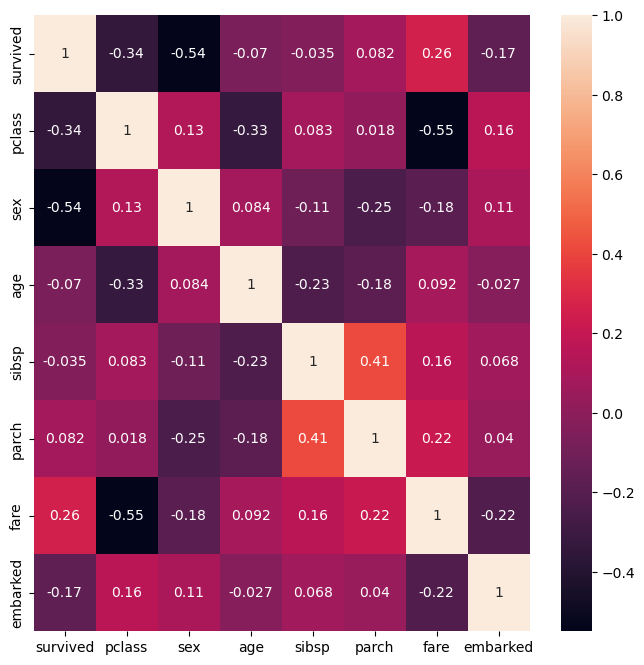

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_titanic = titanic.select_dtypes(include=['number'])

# Calculate correlation coefficients
correlation_matrix = numeric_titanic.corr()

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


### Feature Transformation

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
convertible_columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
convertible_columns = [col for col in convertible_columns if col in titanic.columns]

titanic[convertible_columns] = titanic[convertible_columns].apply(pd.to_numeric, errors='ignore', downcast='integer')

print(titanic.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500         2  Third    man   
1         1       1    0  38.0      1      0  71.2833         0  First  woman   
2         1       3    0  26.0      0      0   7.9250         2  Third  woman   
3         1       1    0  35.0      1      0  53.1000         2  First  woman   
4         0       3    1  35.0      0      0   8.0500         2  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


In [21]:
col_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']

In [22]:
X_data_scaled = X_data.copy()
col_names = X_data.columns
features = X_data_scaled[col_names]

MinMax Scaling

In [29]:
X_data_scaled = titanic.copy()

#columns for scaling
numeric_features = ['age', 'fare', 'sibsp', 'parch']
scaler = MinMaxScaler()
X_data_scaled[numeric_features] = scaler.fit_transform(titanic[numeric_features])

print(X_data_scaled.head())

   survived  pclass  sex       age  sibsp  parch      fare  embarked  class  \
0         0       3    1  0.271174  0.125    0.0  0.014151         2  Third   
1         1       1    0  0.472229  0.125    0.0  0.139136         0  First   
2         1       3    0  0.321438  0.000    0.0  0.015469         2  Third   
3         1       1    0  0.434531  0.125    0.0  0.103644         2  First   
4         0       3    1  0.434531  0.000    0.0  0.015713         2  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Feature Creation

This feature helps in understanding the size of the travel group

In [30]:
# Create FamilySize feature
X_data['FamilySize'] = X_data['sibsp'] + X_data['parch'] + 1
print(X_data.head())

   pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0       3    1  22.0      1      0   7.2500         2  Third    man   
1       1    0  38.0      1      0  71.2833         0  First  woman   
2       3    0  26.0      0      0   7.9250         2  Third  woman   
3       1    0  35.0      1      0  53.1000         2  First  woman   
4       3    1  35.0      0      0   8.0500         2  Third    man   

   adult_male deck  embark_town alive  alone  FamilySize  
0        True  NaN  Southampton    no  False           2  
1       False    C    Cherbourg   yes  False           2  
2       False  NaN  Southampton   yes   True           1  
3       False    C  Southampton   yes  False           2  
4        True  NaN  Southampton    no   True           1  


### Polynomial Features

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
file_path = 'HousingData.csv'
data = pd.read_csv(file_path)

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [41]:
#generate polynomial features for all numerical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

Create polynomial features

In [47]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_imputed)

# Convert the result back to a DataFrame 
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
print(poly_features_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  ...  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  ...   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0  ...   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0  ...   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0  ...   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0  ...   

   PTRATIO^2  PTRATIO B  PTRATIO LSTAT  PTRATIO MEDV          B^2    B LSTAT  \
0     234.09   6072.570       76.19400        367.20  157529.6100  1976.5620   
1     316.84   7064.820      162.69200        384.48  157529.6100  3627.6660   
2     316.84   6992.374       71.73400        617.66  154315.4089  1583.1049   
3     349.69   7379.581       54.97800        624.58  155732.8369  1160.2122   
4     349.69   7422.030      237.77858        676.94  157529.6100  5046.7550   

      B MEDV     LSTAT^2  LSTAT MEDV   MEDV^2  
0 

### Handling Categorical Features

one-hot encoding

In [52]:
# Select categorical columns
cat_cols = ['sex', 'embarked', 'class']
encoded_df = pd.get_dummies(titanic, columns=cat_cols, drop_first=True)

LabelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'class'
titanic['class_encoded'] = label_encoder.fit_transform(titanic['class'])


Convert the class column to numeric values using label encoding.

In [60]:
from sklearn.preprocessing import LabelEncoder

data = {
    'survived': [0, 1, 1, 1, 0],
    'pclass': [3, 1, 3, 1, 3],
    'sex': ['male', 'female', 'female', 'female', 'male'],
    'age': [22.0, 38.0, 26.0, 35.0, 35.0],
    'sibsp': [1, 1, 0, 1, 0],
    'parch': [0, 0, 0, 0, 0],
    'fare': [7.25, 71.2833, 7.925, 53.1, 8.05],
    'embarked': ['S', 'C', 'S', 'S', 'S'],
    'class': ['Third', 'First', 'Third', 'First', 'Third'],
    'who': ['man', 'woman', 'woman', 'woman', 'man'],
    'adult_male': [True, False, False, False, True],
    'deck': [None, 'C', None, 'C', None],
    'embark_town': ['Southampton', 'Cherbourg', 'Southampton', 'Southampton', 'Southampton'],
    'alive': ['no', 'yes', 'yes', 'yes', 'no'],
    'alone': [False, False, True, False, True]
}

label_encoder = LabelEncoder()
titanic['class_encoded'] = label_encoder.fit_transform(titanic['class'])

target_encoding_map = titanic.groupby('alive')['class_encoded'].mean().to_dict()
titanic['alive_encoded'] = titanic['alive'].map(target_encoding_map)


print(titanic)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  deck  embark_town alive  alone  class_encoded  \
0    man        True  None  Southampton    no  False              1   
1  woman       False     C    Cherbourg   yes  False              0   
2  woman       False  None  Southampton   yes   True              1   
3  woman       False     C  Southampton   yes  False              0   
4    man        True  None  Southampton    no   True              1   

   alive_encoded  
0       1.000000  
1       0.333333  
2       0.333333  
3       0.333333  
4       1.000000  
